## GDP & life expectancy project

The data was previously cleaned for project purposes.

The scope of this project is first to make an EDA while applying matplotlib and seaborn libraries to identify trends in the Data. 

Secondly, identify if GPD (GDP = Consumption + Investment + Government Spending + Net Exports) and life expectancy correlate in each country.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("all_data.csv")
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


<Axes: xlabel='Life expectancy at birth (years)', ylabel='Country'>

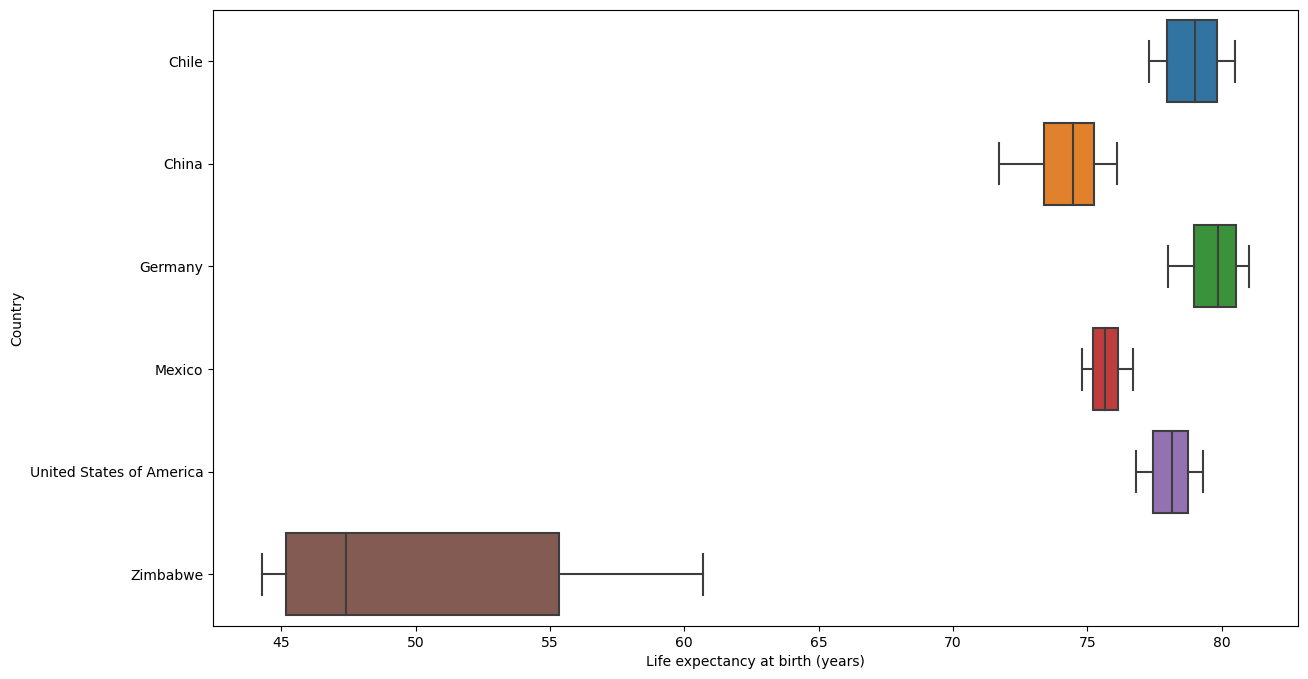

In [46]:
fig = plt.figure(figsize = (14, 8))
sns.boxplot(x=data["Life expectancy at birth (years)"], y=data.Country, data=data)

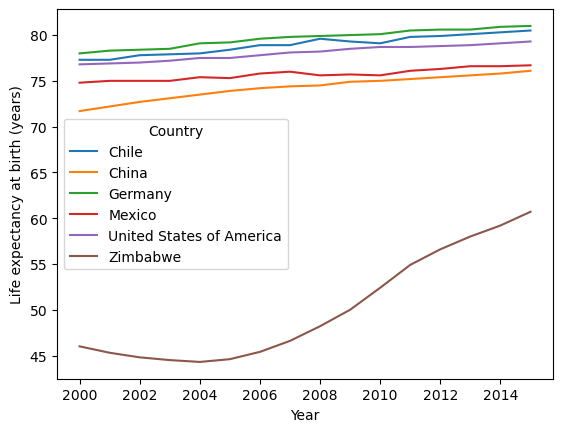

In [5]:
sns.lineplot(x= data.Year, y=data["Life expectancy at birth (years)"], hue=data.Country)
plt.show()
plt.close()

**I can assume that all the countries have increased their life expectancy over the years. The difference between the top 5 and Zimbabwe makes it difficult to identify the dimensions between each country**

C:\Users\Facundo\AppData\Local\Temp\ipykernel_28536\3888138089.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_Life_ex_data = Life_ex_data.pivot("Year", "Country", "Life expectancy at birth (years)")


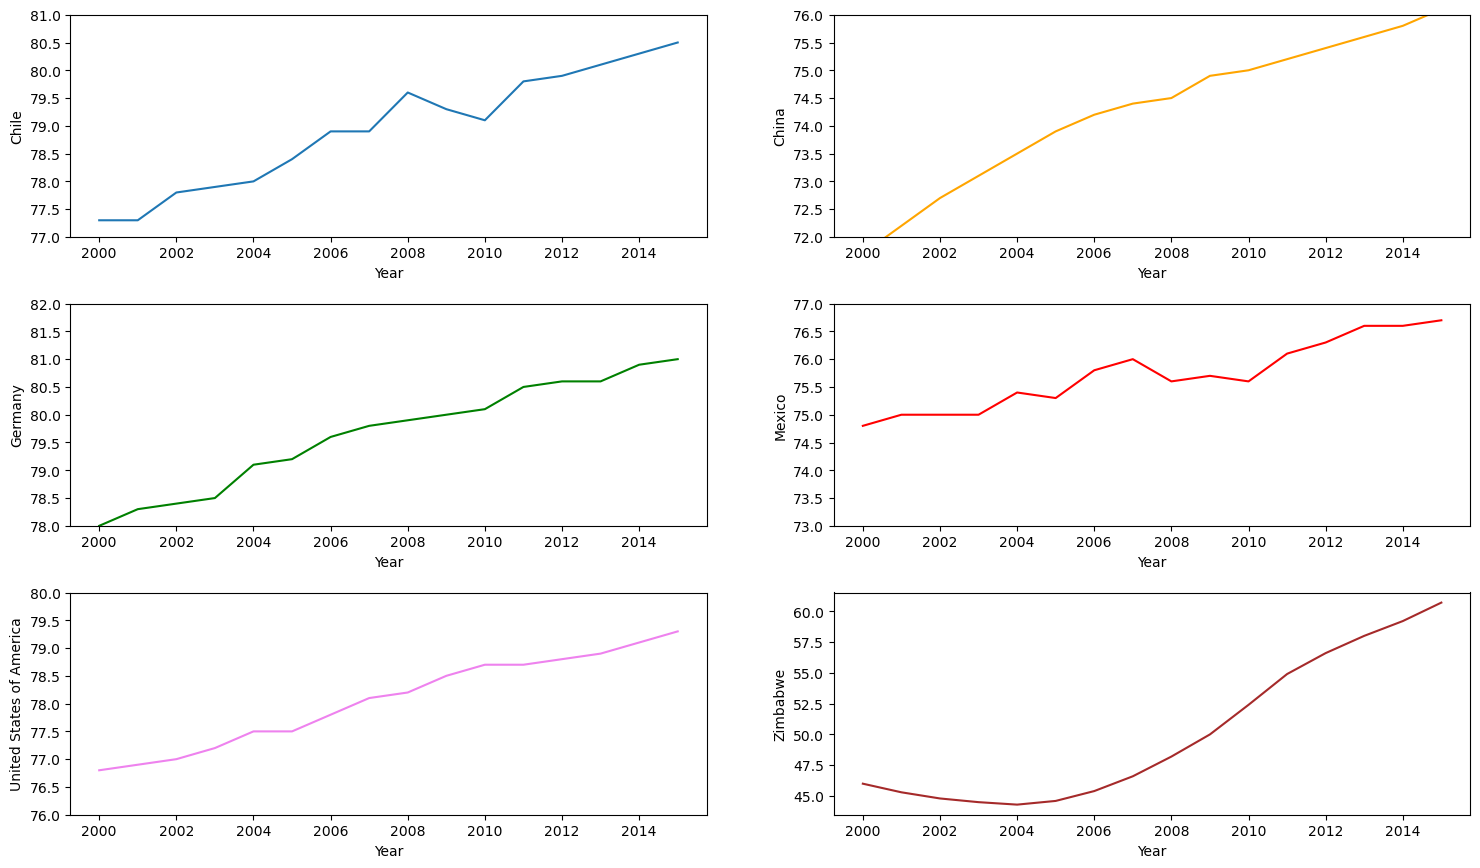

In [7]:
Life_ex_data = data[["Year","Life expectancy at birth (years)","Country"]]
pivot_Life_ex_data = Life_ex_data.pivot("Year", "Country", "Life expectancy at birth (years)")
pivot_Life_ex_data.head()

fig = plt.figure(figsize = (14, 8))

ax1 = plt.subplot(3,2,1)
sns.lineplot(data=pivot_Life_ex_data["Chile"])
ax1.set(ylim=(77, 81))

ax2 = plt.subplot(3,2,2)
sns.lineplot(data=pivot_Life_ex_data["China"], color="orange")
ax2.set(ylim=(72, 76))

ax3 = plt.subplot(3,2,3)
sns.lineplot(data=pivot_Life_ex_data["Germany"], color="green")
ax3.set(ylim=(78, 82))

ax4 = plt.subplot(3,2,4)
sns.lineplot(data=pivot_Life_ex_data["Mexico"], color="r")
ax4.set(ylim=(73, 77))

ax5 = plt.subplot(3,2,5)
sns.lineplot(data=pivot_Life_ex_data["United States of America"], color="violet")
ax5.set(ylim=(76, 80))


ax6 = plt.subplot(3,2,6)
sns.lineplot(data=pivot_Life_ex_data["Zimbabwe"], color="brown")


plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.3)



**After these plots, we can easily appreciate that life expectancy is increasing over the years for all the countries, but with different scales.**

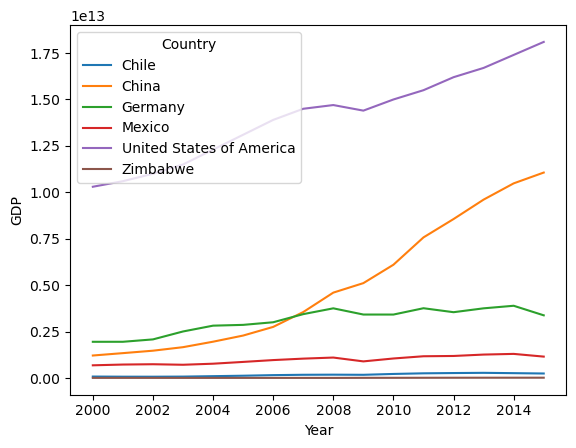

In [8]:
sns.lineplot(x= data.Year, y=data["GDP"], hue=data.Country)
plt.show()
plt.close()

**Here I identify that the United States is the country with a higher GDP and China is emerging in the last few years. This graph is not appreciable for other countries. Therefore, next, I will provide a chart per country to identify trends per unit.** 

C:\Users\Facundo\AppData\Local\Temp\ipykernel_28536\4189160964.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_GDP_data = GDP_data.pivot("Year", "Country", "GDP")


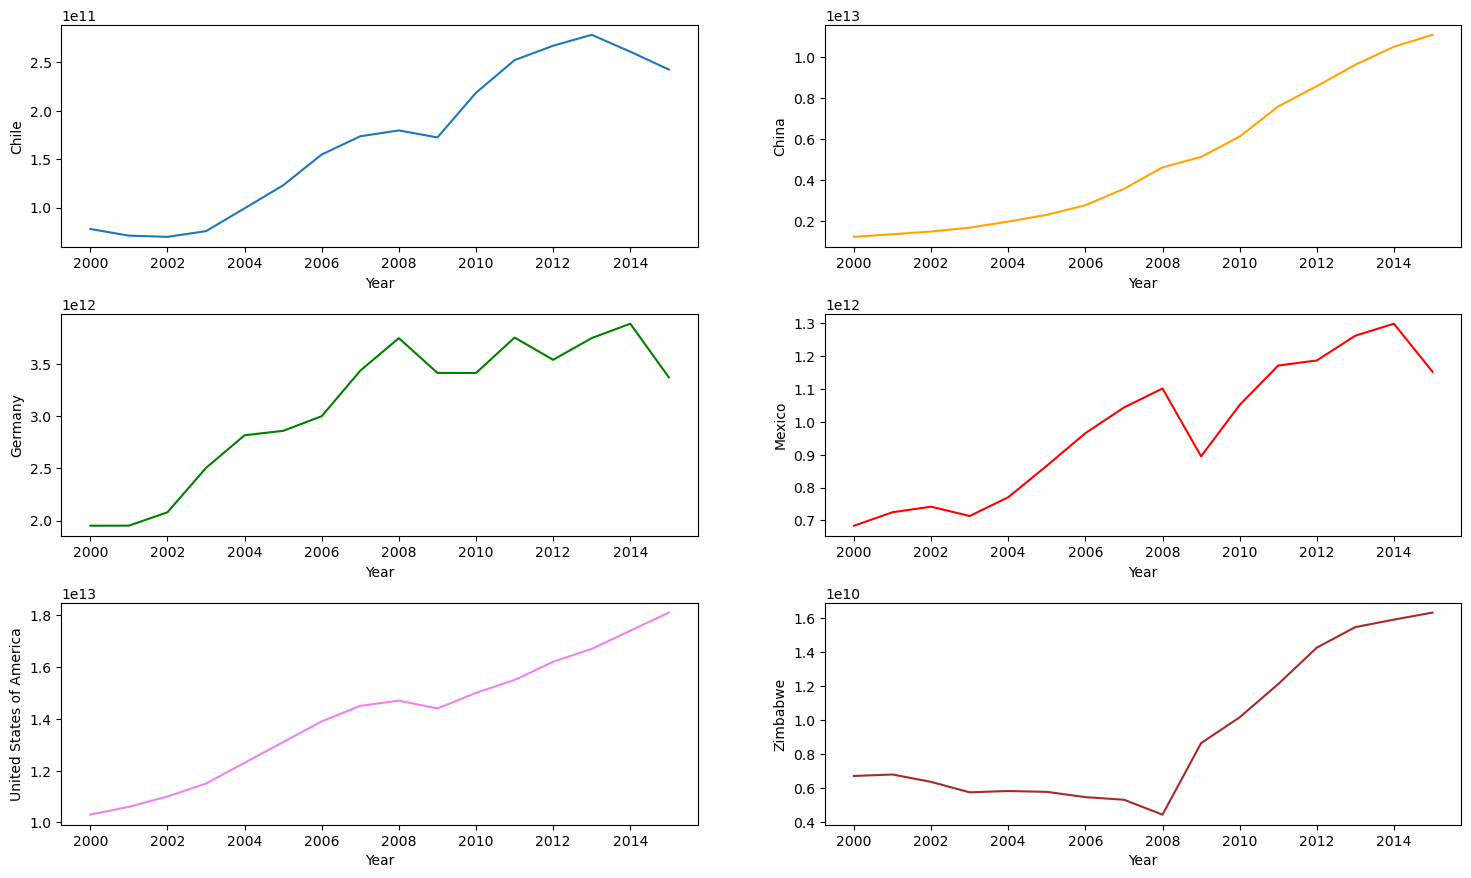

In [37]:
GDP_data = data[["Year","GDP","Country"]]
pivot_GDP_data = GDP_data.pivot("Year", "Country", "GDP")
pivot_GDP_data.head()

fig = plt.figure(figsize = (14, 8))

ax1 = plt.subplot(3,2,1)
sns.lineplot(data=pivot_GDP_data["Chile"])


ax2 = plt.subplot(3,2,2)
sns.lineplot(data=pivot_GDP_data["China"], color="orange")

ax3 = plt.subplot(3,2,3)
sns.lineplot(data=pivot_GDP_data["Germany"], color="green")

ax4 = plt.subplot(3,2,4)
sns.lineplot(data=pivot_GDP_data["Mexico"], color="r")

ax5 = plt.subplot(3,2,5)
sns.lineplot(data=pivot_GDP_data["United States of America"], color="violet")


ax6 = plt.subplot(3,2,6)
sns.lineplot(data=pivot_GDP_data["Zimbabwe"], color="brown")


plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.3)


**Comment: These charts are not comparable to each other because the scales are different. Other than that, Germany, Mexico, and Chile had a decrease last year, while the remaining countries had a steady increase.**

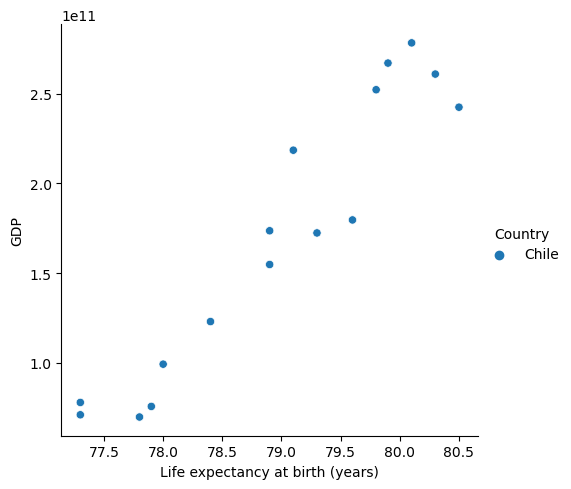

In [104]:
country = "Chile"
def plot(country):
    sns.relplot(data=data.loc[data['Country'] == country], x=data["Life expectancy at birth (years)"].loc[data['Country'] == country], y=data["GDP"].loc[data['Country'] == country], hue=data.Country.loc[data['Country'] == country])
    plt.show()
    
plot("Chile")

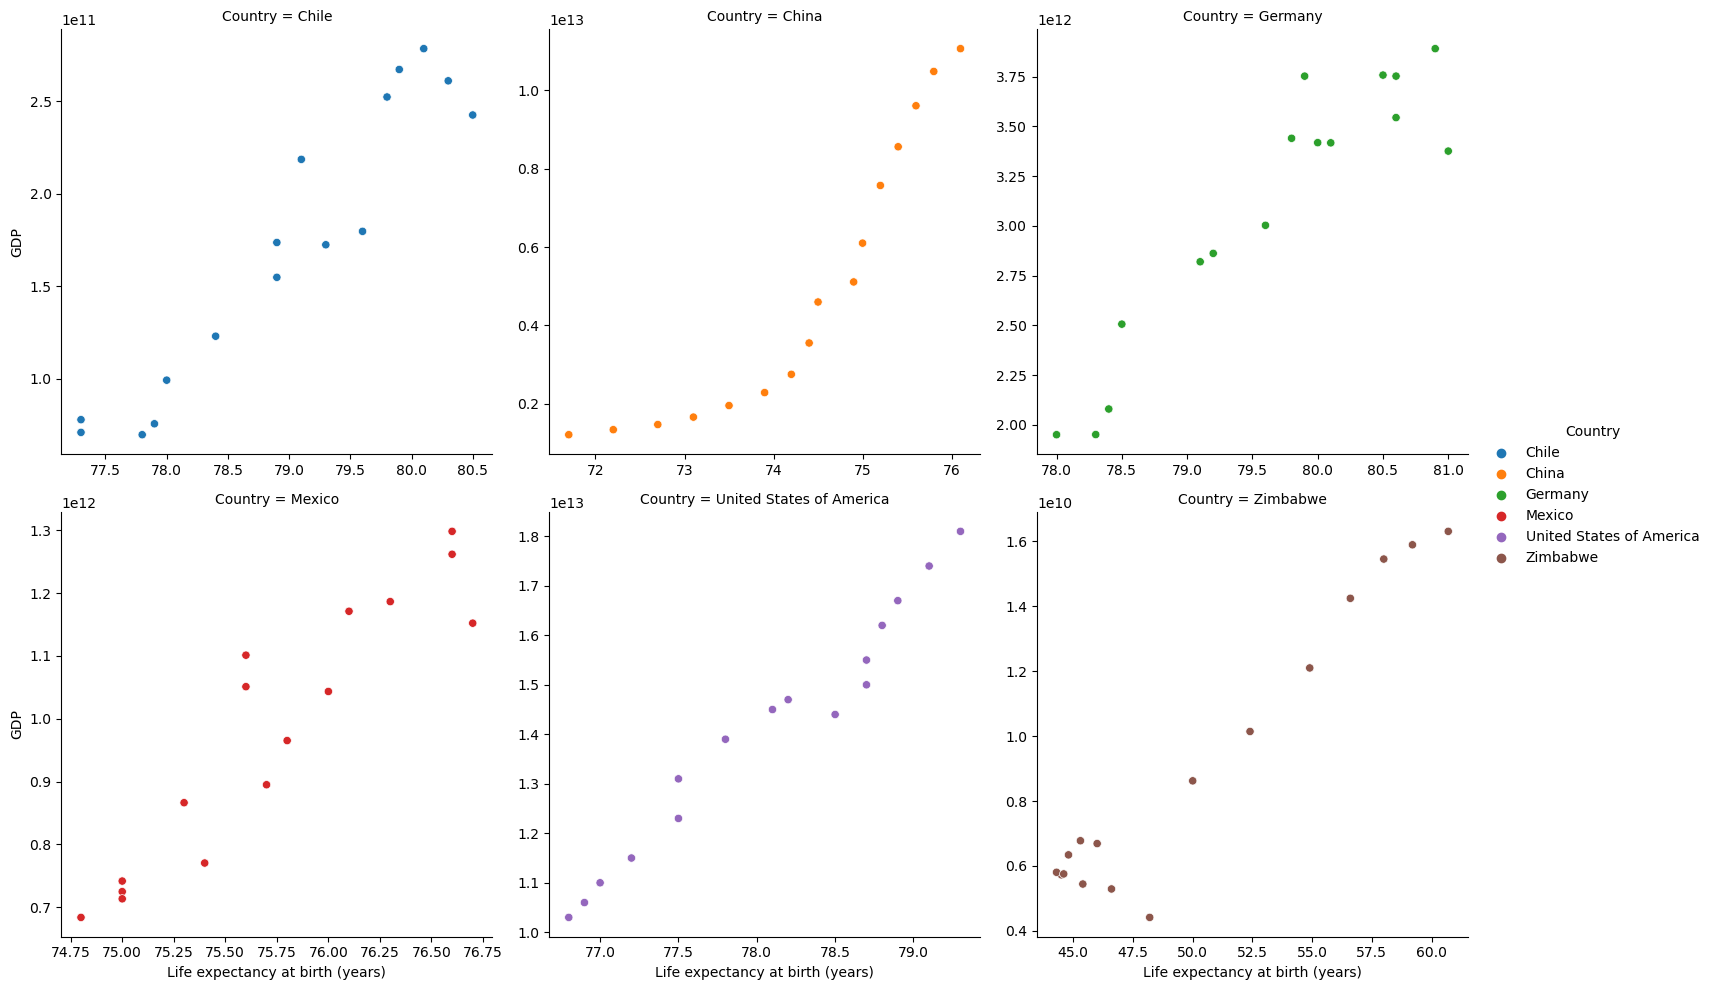

In [106]:
sns.relplot(data=data, x=data["Life expectancy at birth (years)"], y=data["GDP"], hue=data.Country, 
            col="Country", col_wrap=3, facet_kws={'sharey': False, 'sharex': False})

**In conclusion, I can easily determine that there is a positive correlation between GDP and life expectancy for each country. This is an incredible finding even though it does not explain causation**